#Importando DataSet

In [192]:
import pandas as pd

In [193]:
dados = pd.read_csv("dados.csv")
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


#Distribuições de Probabilidade

##Distribuição Binomial

In [194]:
from scipy.special import comb

60 números na Mega e pode escolher 6. Quantas combinações possíveis e qual a chance de ganhar fazendo 1 jogo?

In [195]:
combinacoes = comb(60, 6)
combinacoes

50063860.0

In [196]:
probabilidade = 1 / combinacoes
print('%0.15f' % probabilidade)

0.000000019974489


Em um concurso para preencher uma vaga de cientista de dados temos um total de 10
questões de múltipla escolha com 3 alternativas possíveis em cada questão. Cada
questão tem o mesmo valor. Suponha que um candidato resolva se aventurar sem ter
estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas
as resposta. Assumindo que a prova vale 10 pontos e a nota de corte seja 5, obtenha a
probabilidade deste candidato acertar 5 questões e também a probabilidade deste
candidato passar para a próxima etapa do processo seletivo.

Número de ensaios

In [197]:
n = 10 #ensaios

Probabilidade de sucesso

In [198]:
p = 1/3
p

0.3333333333333333

Probabilidade de fracasso

In [199]:
q = 1 - p
q

0.6666666666666667

Total de eventos que se deseja sucesso

In [200]:
k = 5
k

5

Solução

In [201]:
prob = comb(n, k) * (p**k) * (q ** (n-k))
prob

0.13656454808718185

In [202]:
from scipy.stats import binom

prob = binom.pmf(k, n, p)
prob

0.1365645480871816

Chance do candidato passar

In [203]:
prob_passar = binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum()
prob_passar

0.21312808006909492

In [204]:
prob_passar = 1 - binom.cdf(4, n, p)
prob_passar

0.21312808006909523

In [205]:
prob_passar = binom.sf(4, n, p)
prob_passar

0.21312808006909525

Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o
hospital da cidade. Na última gincana se sabe que a proporção de participantes do sexo
feminino foi de 60%. O total de equipes, com 12 integrantes, inscritas na gincana
deste ano é de 30. Com as informações acima responda: Quantas equipes deverão ser
formadas por 8 mulheres?

In [206]:
p = 0.6

In [207]:
n = 12

In [208]:
k = 8 

In [209]:
prob = binom.pmf(k, n, p)
prob

0.21284093952

In [210]:
media = 30 * prob
media

6.3852281856

##Distribuição de Poisson

Um restaurante recebe em média 20 pedidos por hora. Qual a chance de que, em
determinada hora escolhida ao acaso, o restaurante receba 15 pedidos?

In [211]:
import numpy as np
np.e

2.718281828459045

In [212]:
media = 20

In [213]:
k = 15

In [214]:
prob = np.e ** (media * -1) * (media ** k) / (np.math.factorial(k))
prob

0.0516488535317584

In [215]:
from scipy.stats import poisson

prob = poisson.pmf(k, media)
prob

0.05164885353175814

##Distribuição Normal

Tabela de padronizações

In [216]:
import pandas as pd
import numpy as np
from scipy.stats import norm
tabela_normal_padronizada = pd.DataFrame(
 [],
 index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
 columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])
for index in tabela_normal_padronizada.index:
 for column in tabela_normal_padronizada.columns:
  Z = np.round(float(index) + float(column), 2)
  tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))


tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace =
True)
tabela_normal_padronizada.head()

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879


Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto
de dados segue uma distribuição aproximadamente normal, com média 1,70 e desvio
padrão de 0,1. Com estas informações obtenha o seguinte conjunto de probabilidades:
- A. probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.
- B. probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e
1,80 metros.
- C. probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

A:

In [217]:
media = 1.7

In [218]:
dp = 0.1

In [219]:
z = (1.8 - media) / dp

In [220]:
prob = 0.8413
prob

0.8413

In [221]:
from scipy.stats import norm

norm.cdf(z)

0.8413447460685431

B:

In [222]:
a = (1.6 - media) / dp
b = (1.8 - media) / dp

norm.cdf(b) - norm.cdf(a) 

0.6826894921370857

C:

In [223]:
a = (1.9 - media) / dp

1 - norm.cdf(a) 

0.02275013194817921

#Amostragem

##Amostragem Aleatória Simples

In [224]:
dados.shape[0]

76840

In [226]:
amostra = dados.sample(n = 1000, random_state = 101)

In [227]:
amostra.shape[0]

1000

In [225]:
dados.Renda.mean()

2000.3831988547631

In [228]:
amostra.Renda.mean()

1998.783

In [229]:
dados.Sexo.value_counts(normalize = True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [230]:
amostra.Sexo.value_counts(normalize = True)

0    0.706
1    0.294
Name: Sexo, dtype: float64

##Amostragem Estratificada

É uma melhoria do processo de amostragem aleatória simples. Neste método é proposta a
divisão da população em subgrupos de elementos com características similares, ou seja,
grupos mais homogêneos. Com estes subgrupos separados, aplica-se a técnica de
amostragem aleatória simples dentro de cada subgrupo individualmente

##Amostragem por Conglomerados

Também visa melhorar o critério de amostragem aleatória simples. Na amostragem por
conglomerados são também criados subgrupos, porém não serão homogêneas como na
amostragem estratificada. Na amostragem por conglomerados os subgrupos serão
heterogêneos, onde, em seguida, serão aplicadas a amostragem aleatória simples ou
estratificada.
Um exemplo bastante comum de aplicação deste tipo de técnica é na divisão da população
em grupos territoriais, onde os elementos investigados terão características bastante
variadas.

#Estimação

##Teorema do Limite Central

O Teorema do Limite Central afirma que, com o aumento do tamanho da
amostra, a distribuição das médias amostrais se aproxima de uma distribuição
normal com média igual à média da população e desvio padrão igual ao desvio
padrão da variável original dividido pela raiz quadrada do tamanho da amostra.
Este fato é assegurado para n maior ou igual a 30.

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem
aproximadamente como uma normal de desvio padrão populacional igual a 150 g.
Selecionada uma amostra aleatório de 20 sacos de um lote específico, obteve-se um peso
médio de 5.050 g. Construa um intervalo de confiança para a média populacional
assumindo um nível de significância de 5%.

In [231]:
n = 2000
total_de_amostras = 1500

In [233]:
amostras = pd.DataFrame()
amostras

""


In [236]:
for i in range(total_de_amostras):
  _ = dados.Idade.sample(n)
  _.index = range(0, len(_))
  amostras['Amostra_' + str(i)] = _

display(amostras)

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,37,59,34,32,36,43,36,42,38,44,...,41,53,51,36,39,35,48,43,30,31
1,59,59,73,56,43,51,40,39,36,31,...,32,45,36,45,45,27,47,41,57,26
2,33,60,51,24,17,42,37,52,46,40,...,36,63,42,42,32,55,42,39,30,50
3,59,65,42,44,33,41,36,34,25,30,...,41,60,45,46,38,43,47,50,26,55
4,41,59,31,56,55,27,61,27,59,28,...,49,31,53,39,52,28,58,66,46,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,51,30,42,55,45,38,29,80,23,60,...,38,36,42,20,29,49,28,57,66,61
1996,48,61,49,67,42,48,27,46,36,37,...,48,52,40,38,60,47,59,35,64,40
1997,53,36,40,33,32,27,55,54,54,46,...,33,70,33,42,27,42,68,35,51,27
1998,33,37,56,58,33,41,28,49,21,29,...,28,63,27,55,30,37,56,31,45,55


In [237]:
amostras.mean()

Amostra_0       44.4225
Amostra_1       43.9160
Amostra_2       44.2430
Amostra_3       44.3935
Amostra_4       43.8500
                 ...   
Amostra_1495    44.0375
Amostra_1496    44.2805
Amostra_1497    43.9780
Amostra_1498    44.3890
Amostra_1499    44.3065
Length: 1500, dtype: float64

<Axes: >

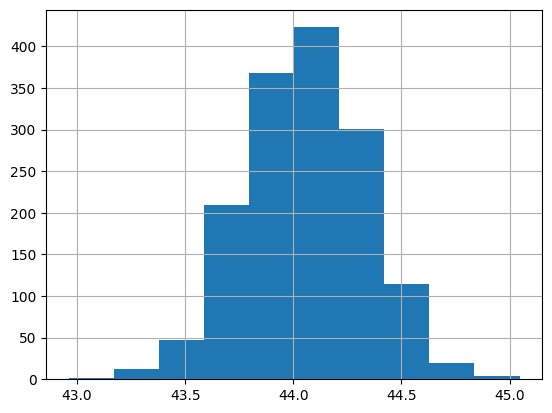

In [239]:
amostras.mean().hist()

In [240]:
dados.Idade.mean()

44.07142113482561

In [241]:
amostras.mean().mean()

44.05374766666667

In [242]:
amostras.mean().std()

0.2759338298944315

In [243]:
dados.Idade.std() / np.sqrt(n)

0.27907433027404266

##Nível de Confiança e Significância

O nível de confiança (1−α) representa a probabilidade de acerto da estimativa. De forma
complementar o nível de significância (α) expressa a probabilidade de erro da estimativa.
O nível de confiança representa o grau de confiabilidade do resultado da estimativa estar
dentro de determinado intervalo. Quando fixamos em uma pesquisa um nível de
confiança de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95%
dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

##Erro Inferencial

O erro inferencial é definido pelo desvio padrão das médias amostrais σ ´x
 e pelo nível
de confiança determinado para o processo.

##Intervalos de Confiança

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem
aproximadamente como uma normal de desvio padrão populacional igual a 150 g.
Selecionada uma amostra aleatório de 20 sacos de um lote específico, obteve-se um peso
médio de 5.050 g. Construa um intervalo de confiança para a média populacional
assumindo um nível de significância de 5%.

In [244]:
media_amostral = 5050
significancia = 0.05

In [246]:
confianca = 1 - significancia
confianca

0.95

In [247]:
tabela_normal_padronizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


O Z é 1,96 ao consultar a tabela.

In [260]:
z = norm.ppf(0.95)
z

1.6448536269514722

In [252]:
dp = 150

In [253]:
n = 20

In [254]:
raiz_de_n = np.sqrt(n)
raiz_de_n

4.47213595499958

In [255]:
sigma = dp / raiz_de_n
sigma

33.54101966249684

In [256]:
e = z * sigma
e #erro inferencial

65.73919054324361

In [257]:
intervalo = (media_amostral - e, media_amostral + e)
intervalo

(4984.260809456757, 5115.739190543243)

In [259]:
norm.interval(alpha=0.95, loc=media_amostral, scale=sigma)

<ipython-input-259-28f5139aa5ae>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  norm.interval(alpha=0.95, loc=media_amostral, scale=sigma)


(4984.260809456757, 5115.739190543243)